In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Reading the dataset
#xls=pd.ExcelFile('HospitalDatabase.xlsx')
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR=pd.read_excel(xls,'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA=pd.read_excel(xls,'Patients')
#Reading the EDVisits sheet
df_EDV=pd.read_excel(xls,'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV=pd.read_excel(xls,'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

### 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.¶

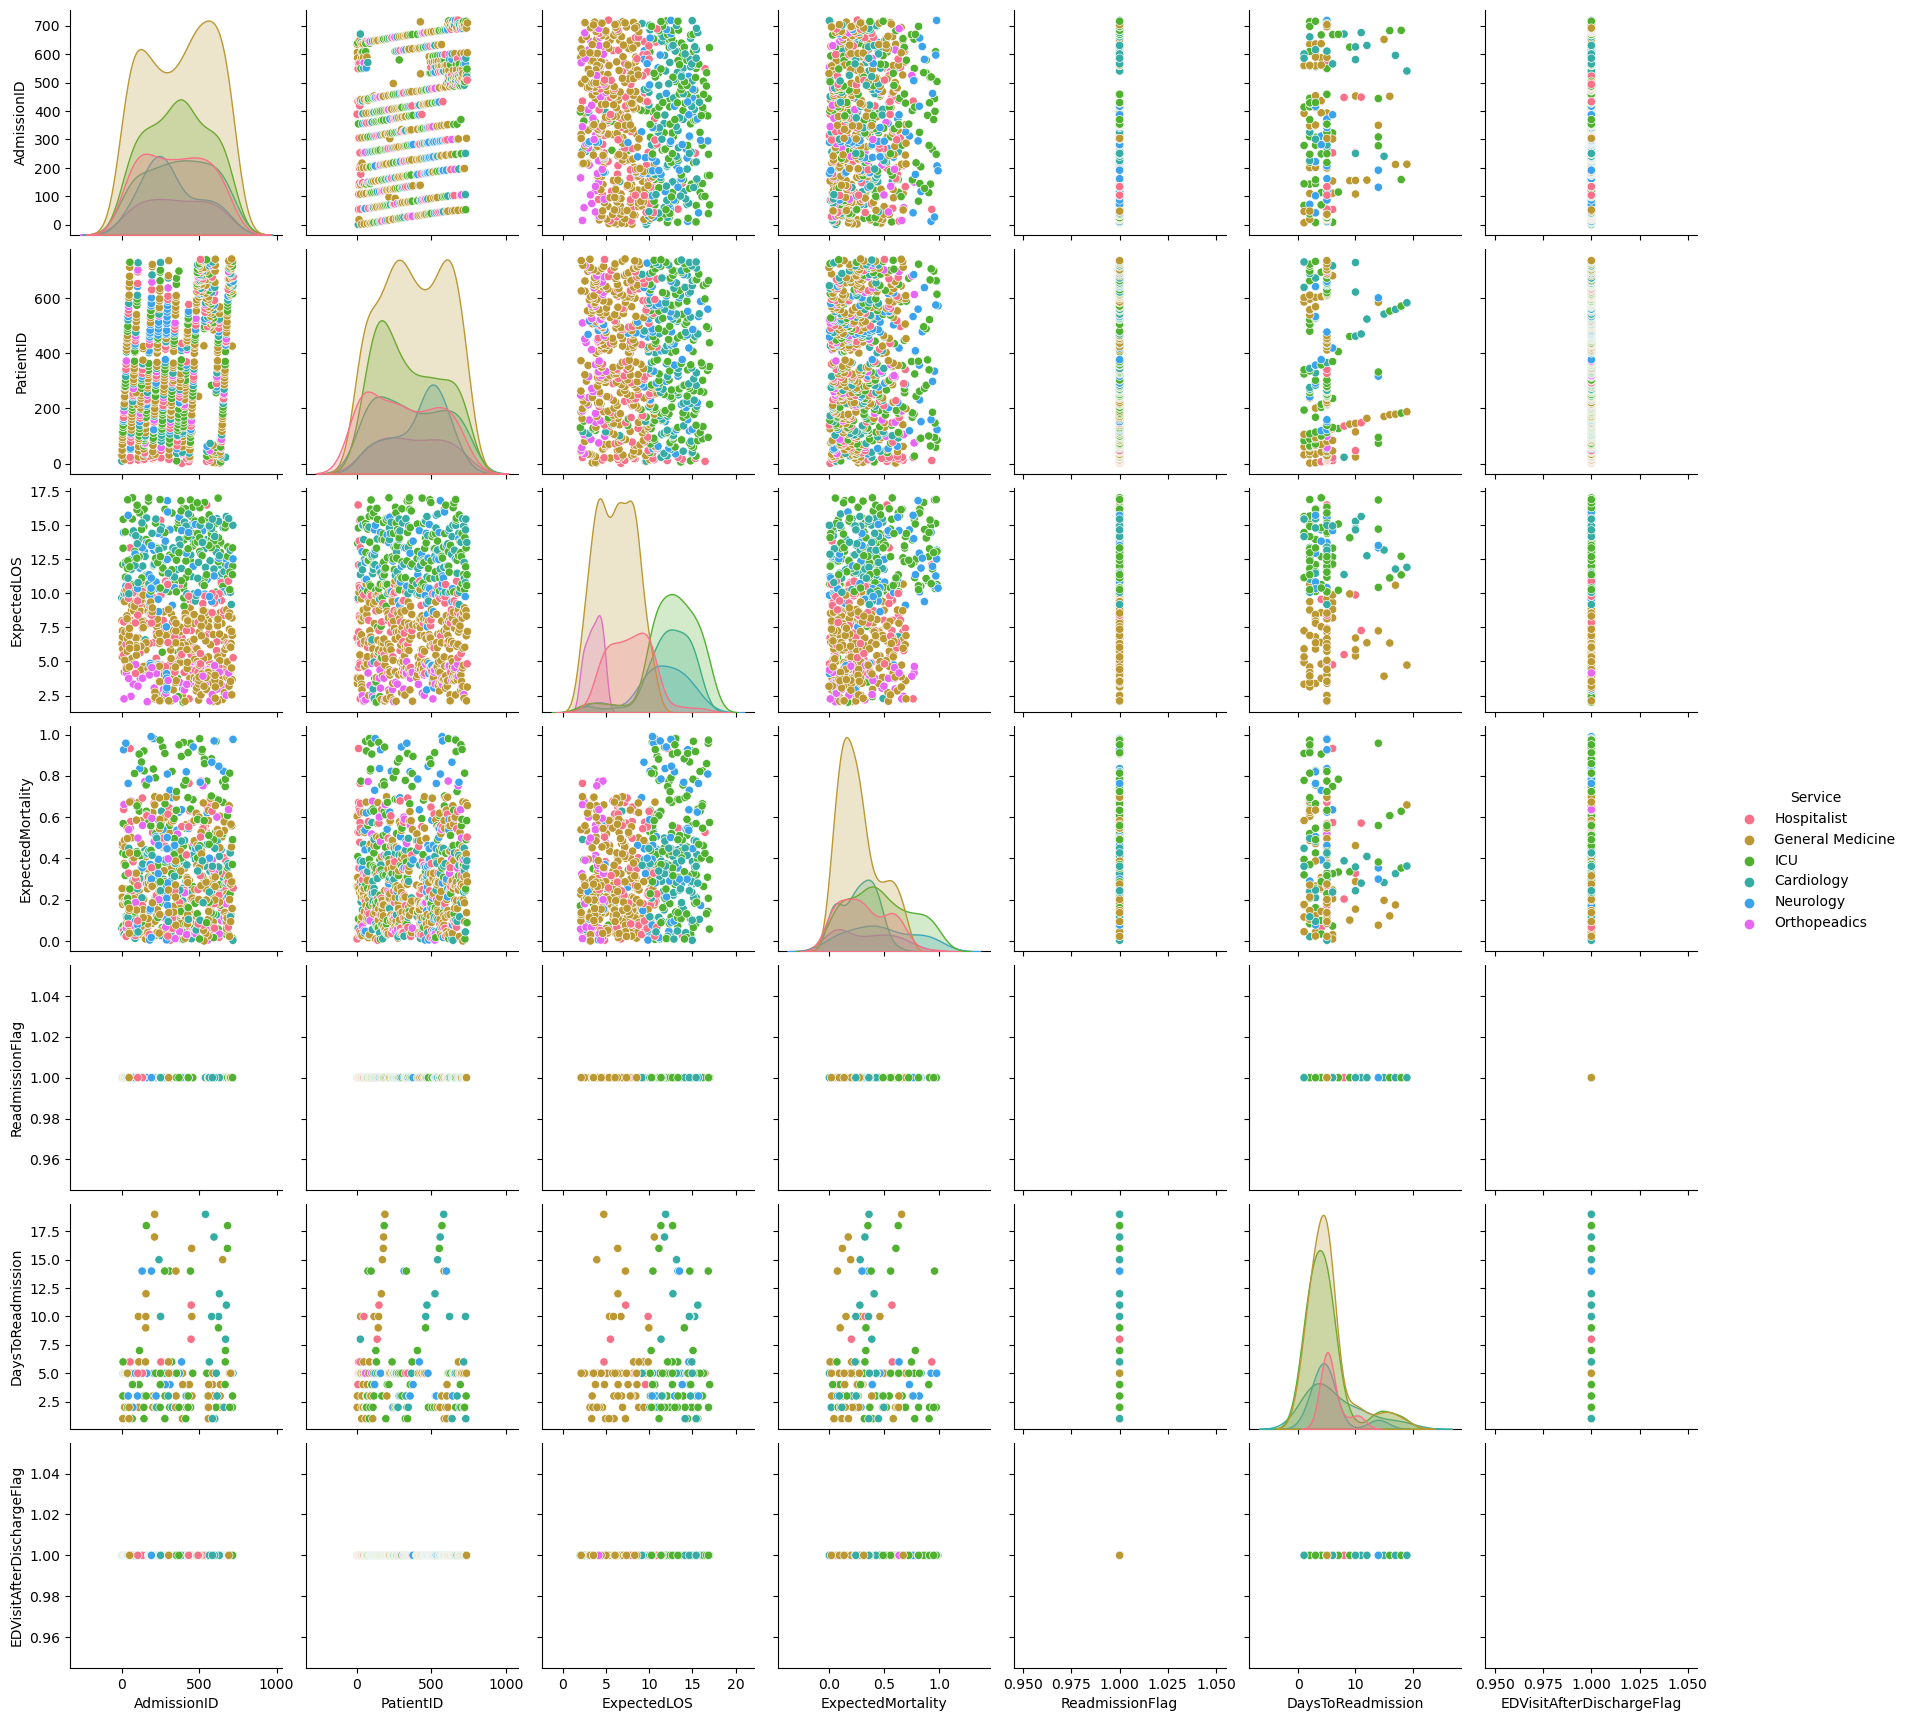

In [4]:
sns.pairplot(df_RR,hue="Service",palette="husl")
plt.show()
#Can not see any co-relation

### 5.Display full name of patients who are born in 1986.

In [5]:
#df_PA.head()
df_PA["FullName"] = df_PA["FirstName"] + ' ' + df_PA["LastName"]
df_PA["DateOfBirth"] = pd.to_datetime(df_PA["DateOfBirth"])
df_PA['BirthYear'] = df_PA["DateOfBirth"].dt.year #extracting year from DateOfbirth

New_df_PA=df_PA[df_PA['BirthYear']==1986] #Result dataframe
New_df_PA[["FullName","BirthYear","DateOfBirth"]]

,FullName,BirthYear,DateOfBirth
23,Gabriel Joseph,1986,1986-05-31 09:36:05.716
24,Lincoln Brenda,1986,1986-07-24 17:36:00.791
29,Ala Halpert,1986,1986-11-26 10:44:22.628
72,Lolita Darci,1986,1986-01-08 02:34:04.596
164,Fadel Bernardt,1986,1986-05-29 00:35:58.694
238,Bentley Kippax,1986,1986-02-11 06:22:40.734
367,Vale Olanda,1986,1986-04-15 00:49:58.690
373,Britt Dureden,1986,1986-11-19 23:50:47.955
386,Cristabel Chatel,1986,1986-07-10 16:27:30.640
415,Constantia Group,1986,1986-03-26 06:37:22.525


### 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [6]:
#isin() method checks if DataFrame contains the specified values
New_df=df_PA[~df_PA['PatientID'].isin(df_RR['PatientID'])] # (~) in pandas is Boolean Not
print(list(New_df['PatientID']))

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

### 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

C:\Users\avnis\AppData\Local\Temp\ipykernel_3404\2204221533.py:17: RuntimeWarning: divide by zero encountered in log10
  axes[1][1].plot(x,np.log10(y),'c--o')


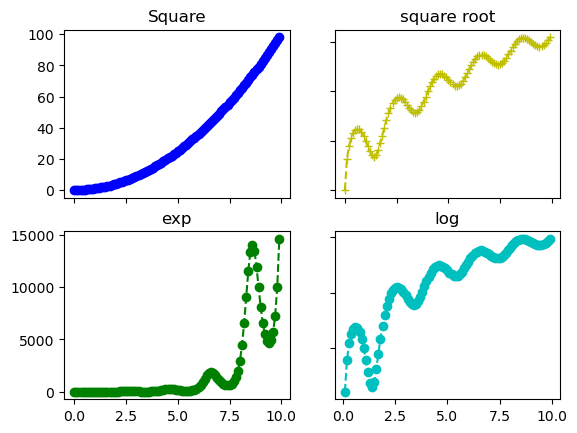

In [7]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi*x)+x

# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)    #syntax= Plt.subplots(nrows, ncols)
# plotting graph for 1st element
axes[0][0].plot(x, x*x,'b--o')         #square of x , solid line with b=  blue color and o= circlular marker
axes[0][0].set_title('Square')  
# plotting graph for 2nd element
axes[0][1].plot(x,np.sqrt(y),'y--+')   #square root of y, solid line with y = yellow color and +=plus marker
axes[0][1].set_title('square root') 
# plotting graph for 3rd element
axes[1][0].plot(x,np.exp(y) ,'g--o')   #exponential of y 
axes[1][0].set_title('exp')  
# plotting graph for 4th element
axes[1][1].plot(x,np.log10(y),'c--o')
axes[1][1].set_title('log')

for axes in fig.get_axes(): # Hide x labels and tick labels for top plots and y ticks for right plots
    axes.label_outer()
plt.show()

### 17.Create a heat map to show the correlation between the column values of Edvisits.

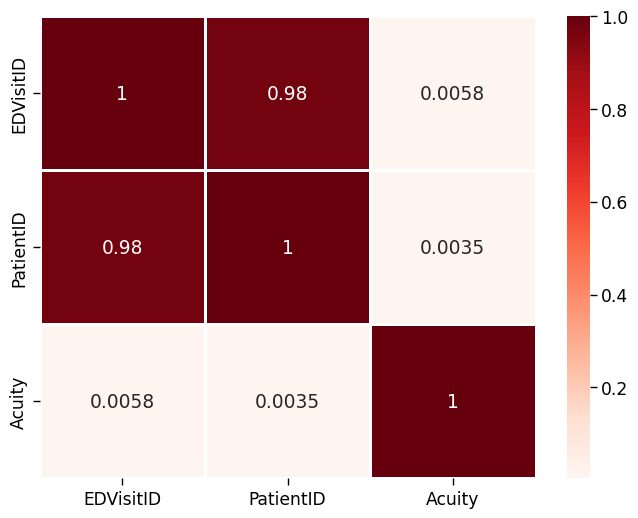

In [8]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

New_df_EDV = df_EDV.corr()
sns.heatmap(New_df_EDV,annot=True, cmap="Reds",linecolor = 'white',linewidth=1)

plt.show()

### 21.Which demographic patients are prone to get stroke?

In [94]:
#merging 'Patient' and 'ReAdmissionRegistry' DataFrames
df = pd.merge(df_PA,df_RR, on = ['PatientID'], how = 'inner')

df["AdmissionDate"] = pd.to_datetime(df["AdmissionDate"])
df["AdmissionYear"] = df["AdmissionDate"].dt.year #extracting year from AdmissionDate
#calculating Age
df["Age"] = df['AdmissionYear'] - df['BirthYear']

#filter the rows where PrimaryDiagnosis is Stroke
df_stroke = df[df["PrimaryDiagnosis"] == 'Stroke']
# count of PatientID group by Race,Gender and sorting it in descending order to get Maximum count of patients
df_stroke.groupby([Race'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head(1) 


,,PatientID
Gender,Race,
Male,Black/African-American,23


Black/African-American are more prone to Stroke

In [10]:

df_stroke.groupby(['Gender'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head(1)


,PatientID
Gender,
Female,36


Females are more prone to Stroke

In [11]:
df_stroke.groupby(['Age'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False)


,PatientID
Age,
57,6
54,6
36,5
43,4
44,4
53,4
34,3
35,3
38,3


 Patients in their  30's,40's and 50's are more prone to stroke

### 25.Plot a graph by counting the no. of patients in each department.

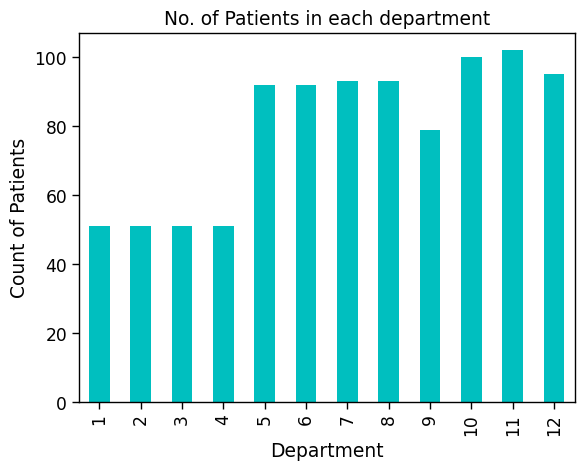

In [12]:
df_AV.groupby(["VisitDepartmentID"])["PatientMRN"].count().plot(kind='bar',color = 'c',ylabel='Count of Patients',xlabel='Department',title='No. of Patients in each department')
plt.show()

### 29.Calculate average LOS.

In [13]:
#approch-1 by using mean() function
df_RR["ExpectedLOS"].mean()


8.824589159156156

In [14]:
#approach-2 by using describe() method to get summary statistics of a dataframe
df_RR.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,366.158333,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,218.223501,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,175.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,353.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,557.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,742.000000,16.998213,0.989945,1.0,19.000000,1.0


### 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

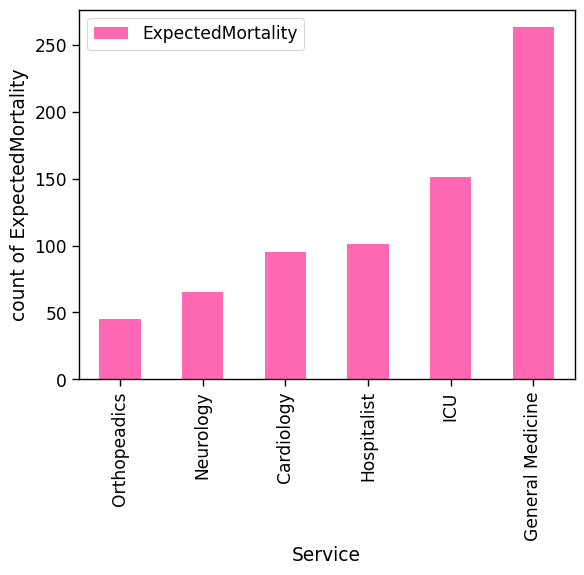

In [15]:
df_D.groupby(["Service"])[["ExpectedMortality"]].count().sort_values("ExpectedMortality").plot(kind='bar',ylabel='count of ExpectedMortality',color='hotpink')
plt.show()



'Orthopeadics' had the least count of Expected Mortality

### 37.Write a function to print all the upper case letter of a given sentence.

In [16]:
# take input
string = input('Enter any string: ')
upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

Enter any string: SoNal
Uppercase characters: SN


### 41. Find the visit type with maximum 'No Show'.

In [17]:
#Approach -1
#groupby 'VisitType' and count number of 'VisitStatus' equal to 'No Show'
#used 'apply' and 'lambda'  to filter 'No Show' values
max_no_show=df_AV.groupby("VisitType")["VisitStatus"].apply(lambda x: (x== 'No Show').sum()).reset_index(name='count of No-Show').sort_values(by="count of No-Show",ascending=False).head(1)
max_no_show

,VisitType,count of No-Show
3,Telemedicine,74


In [18]:
#Approach-2
show=df_AV[df_AV.VisitStatus == 'No Show']   #filterout no show from visit status
show
show.groupby(['VisitType'])[['VisitType']].count().idxmax()   #grouping visit type  with max  noshow using idxmax() 

VisitType    Telemedicine
dtype: object

### 45.Calculate mortality by diagnosis.

In [19]:
#groupby 'PrimaryDiagnosis' and count number of 'DischargeDisposition' equal to 'Expired'
df_RR.groupby('PrimaryDiagnosis')["DischargeDisposition"].apply(lambda x: (x=='Expired').sum()).reset_index(name='Mortality')

,PrimaryDiagnosis,Mortality
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


### 49.Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [22]:
#filtering the rows with SBP>180 and DBP>120
SBP=df_AV['BloodPressureSystolic']>180
DBP=df_AV['BloodPressureDiastolic']>120
a=df_AV.loc[SBP & DBP]
len(a.PatientMRN.drop_duplicates()) # len function is used to count number of rows 

87

### 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [37]:
df_EDV

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


### 57.Find the age prone to get stroke.

In [52]:
#for dataframe 'df' reference check question 21
df.groupby('Age')['PrimaryDiagnosis'].apply(lambda x : (x=='Stroke').sum()).sort_values(ascending=False).


Age
57    6
54    6
36    5
53    4
43    4
44    4
33    3
34    3
35    3
38    3
48    3
40    3
51    3
45    2
50    2
56    2
49    2
58    2
47    2
46    1
32    1
52    1
42    1
41    1
37    1
55    0
39    0
31    0
Name: PrimaryDiagnosis, dtype: int64

Patients with age 57,54 are more prone to get Stroke


### 61.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).

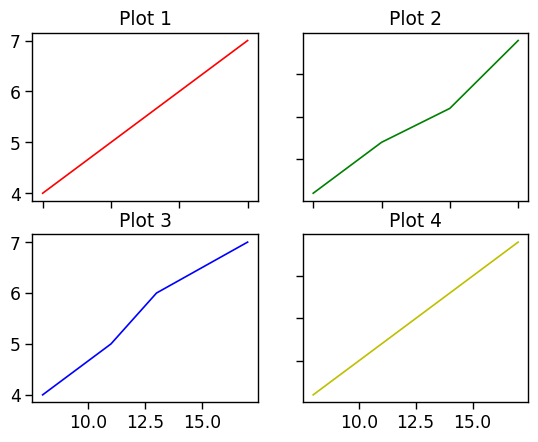

In [76]:
x=[4,5,6,7]
y=[8,11,13,17]

# creating the canvas with class 'fig'
fig, axes =plt.subplots(nrows=2, ncols=2)

# plotting graph for 1st element
axes[0][0].plot(x,x,'r')
axes[0][0].set_title('Plot 1') 
axes[0][1].plot(x,y,'g')
axes[0][1].set_title('Plot 2') 
axes[1][0].plot(y,x,'b')
axes[1][0].set_title('Plot 3') 
axes[1][1].plot(y,y,'y')
axes[1][1].set_title('Plot 4') 

for axes in fig.get_axes(): # Hide x labels and tick labels for top plots and y ticks for right plots
    axes.label_outer()
plt.show()

### 65.Get the  number of patients based on service and primary diagnosis.

In [95]:
df_RR.groupby(['Service','PrimaryDiagnosis'])['PatientID'].count().reset_index(name='Count of Patients')


,Service,PrimaryDiagnosis,Count of Patients
0,Cardiology,AMI,40
1,Cardiology,Afib,10
2,Cardiology,Broken Leg,3
3,Cardiology,Flu,2
4,Cardiology,Heart Failure,39
5,Cardiology,Kidney Failure,1
6,General Medicine,Broken Leg,3
7,General Medicine,Diabetes,38
8,General Medicine,Fever,13
9,General Medicine,Flu,54
